In [2]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.misc import imread
import glob
import copy

In [19]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(
    'http://www.clker.com/cliparts/c/b/8/6/11949911991537719366chess_set_symbols_igor_k_01.svg.hi.png')

# img = np.array(Image.open('chess_pieces.png'))[:,:,3]
img = np.array(Image.open(BytesIO(response.content)))[:,:,3]


In [20]:
chess_vector = img

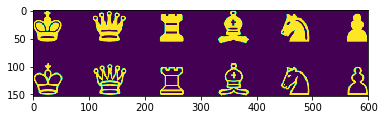

In [21]:
plt.imshow(img)
# plt.savefig('12-12-17')
plt.show()

In [22]:
chess_vector.shape

(153, 600)

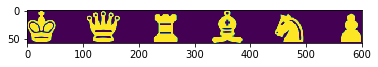

In [23]:
black = chess_vector[:58,:]
plt.imshow(black)

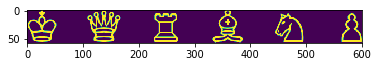

In [24]:
white = chess_vector[-58:,:]
side_len = len(white)
plt.imshow(white)

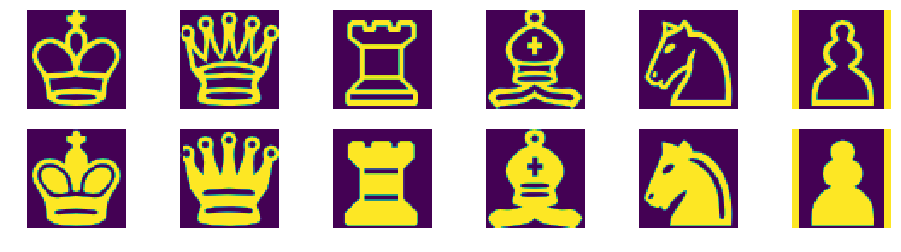

In [25]:
white_pieces = ['king_w','queen_w','rook_w','bishop_w','knight_w','pawn_w'] #key for white chess pieces dictionary
black_pieces = ['king_b','queen_b','rook_b','bishop_b','knight_b','pawn_b'] #key for black chess pieces dictionary

w = [white[:,n*100:(n+1)*100] for n in range(6)] #rough cropping for white chess pieces
b = [black[:,n*100:(n+1)*100] for n in range(6)] #rough cropping for black chess pieces

w_new = [] #editted cropping
b_new = [] #editted cropping

for i,j in zip(range(0,60,10), range(len(w)+1)): #fix pawn
    w_new.append(w[j][:,i:i+side_len])
    b_new.append(b[j][:,i:i+side_len])
    
w_new[0] = np.roll(w_new[0], 2)
w_new[1] = np.roll(w_new[1], 1)
w_new[-3] = np.roll(w_new[-3], -1)
w_new[-2] = np.roll(w_new[-2], -1)
w_new[-1] = np.roll(w_new[-1], -6)

b_new[0] = np.roll(b_new[0], 3)
b_new[1] = np.roll(b_new[1], 2)
b_new[-3] = np.roll(b_new[-3], 0)
b_new[-2] = np.roll(b_new[-2], -1)
b_new[-1] = np.roll(b_new[-1], -5)

blank_space = np.full((58, 58), 255, dtype=int) #fixed pawn
blank_space[0:58, 4:54] = w_new[5]
w_new[5] = blank_space
blank_space = np.full((58, 58), 255, dtype=int) #fixed pawn
blank_space[0:58, 4:54] = b_new[5]
b_new[5] = blank_space

fig, ax = plt.subplots(2,6,figsize=(16,4))
for idx, im in enumerate(w_new):
    ax[0,idx].imshow(im)
    ax[0,idx].axis('off')
    
for idx, im in enumerate(b_new):
    ax[1,idx].imshow(im)
    ax[1,idx].axis('off')

In [26]:
white_dict = dict(zip(white_pieces, w_new))
black_dict = dict(zip(black_pieces, b_new))
plt.show()

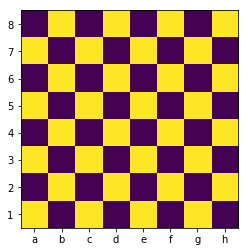

In [27]:
def init_board():
    block_w = np.zeros((60*60,), dtype=np.int).reshape(60,60)
    block_b = np.ones((60*60,), dtype=np.int).reshape(60,60)

    row1 = np.hstack([block_w,block_b])
    row1 = np.hstack([row1,row1])
    row1 = np.hstack([row1,row1])
    row2 = np.roll(row1,60)

    board = np.vstack([row1,row2])
    board = np.vstack([board,board])
    board = np.vstack([board,board])
    return board

board = init_board()
plt.imshow(board)
plt.xticks([(val*60)+30 for val in range(8)],list('abcdefgh'))
plt.yticks([(val*60)+30 for val in range(8)][::-1],list('12345678'))
plt.show()

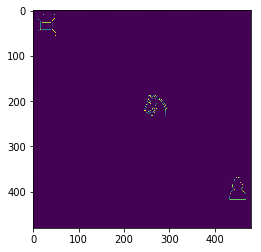

In [28]:
def place_piece(row,col,piece_type,piece_color,board_in):
    
    if piece_color == 'w':
        piece = copy.copy(white_dict[piece_type + '_' + piece_color])
    elif piece_color == 'b':
        piece = copy.copy(black_dict[piece_type + '_' + piece_color])
        
    for i in range(len(piece)): #convert rgb to binary
        for j in range(len(piece[0])):
            if (piece[i][j] == 255):
                piece[i][j] = 1
    
    board_out = copy.copy(board_in)
    
#     plt.imshow(board_out); plt.show()

#     board_out[row*60+1:(row+1)*60-1,col*60+1:(col+1)*60-1] = ~board_out[row*60+1:(row+1)*60-1,col*60+1:(col+1)*60-1] + ~piece 
#     board_out[row*60+1:(row+1)*60-1,col*60+1:(col+1)*60-1] += ~piece 
#     print (board_in[row*60+1:(row+1)*60-1,col*60+1:(col+1)*60-1].shape)
    board_out[row*60+1:(row+1)*60-1,col*60+1:(col+1)*60-1] += piece
    return board_out

board2 = place_piece(0,0,'rook','b',board)
board2 = place_piece(6,7,'pawn','b',board2)
board2 = place_piece(3,4,'knight','w',board2)
plt.imshow(board2)
plt.show()
# plt.savefig('test.jpg') save the figure

In [16]:
class ChessBoard:
    __block_w = np.zeros((60*60,), dtype=np.int).reshape(60,60)
    __block_b = np.ones((60*60,), dtype=np.int).reshape(60,60)

    __row1 = np.hstack([__block_w,__block_b])
    __row1 = np.hstack([__row1,__row1])
    __row1 = np.hstack([__row1,__row1])
    __row2 = np.roll(__row1,60)

    __board_new = np.vstack([__row1,__row2])
    __board_new = np.vstack([__board_new,__board_new])
    white_pieces = ['king_w','queen_w','rook_w','bishop_w','knight_w','pawn_w'] #key for white chess pieces dictionary
    black_pieces = ['king_b','queen_b','rook_b','bishop_b','knight_b','pawn_b'] #key for black chess pieces dictionary
    
    
    global STATIC_BOARD
    STATIC_BOARD = np.vstack([__board_new,__board_new])
    def __init__(self):
        self.board = STATIC_BOARD
    
    def place_piece(self,row,col,piece_type,piece_color):
        if piece_color == 'w':
            piece = copy.copy(white_dict[piece_type + '_' + piece_color])
        elif piece_color == 'b':
            piece = copy.copy(black_dict[piece_type + '_' + piece_color])
        #add piece to piece_maps
        for i in range(len(piece)): #convert rgb to binary
            for j in range(len(piece[0])):
                if (piece[i][j] != 0):
                    piece[i][j] = 1
        return self.board
    
#     def piece_map(self, piece_type, piece_color):
#         return a binary map of the piece on the board
        
    def clear_board(self):
#         self.board = []
        self.board = self.STATIC_BOARD
        return self.board

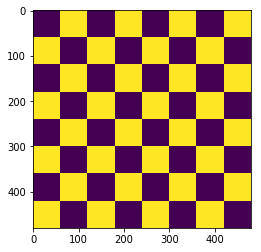

In [17]:
c = ChessBoard()
c.place_piece(3,7,'knight','w')
plt.imshow(c.board); plt.show()

In [18]:
plt.imshow(c.clear_board()); plt.show()

AttributeError: ChessBoard instance has no attribute 'STATIC_BOARD'